# 滑动窗口

滑动窗口，为了提升数据的准确性，将某个点的取值扩大到包含这个点的一段区间，用区间来进行判断，这个区间就是窗口。滑动窗口就是能够根据指定的单位长度来框住时间序列，从而计算框内的统计指标。相当于一个长度指定的滑块在刻度尺上面滑动，每滑动一个单位即可反馈滑块内的数据。

## rolling

![hellworld](../images/rolling.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#数据准备
v = np.random.randn(200)
tx = pd.Series(v)
tx.index = pd.date_range('2018-1-01', periods = 200, freq = "d")
#print("tx", "-" * 20, "\n", tx)

w = np.random.randn(200)
ty = pd.Series(w)
ty.index = pd.date_range('2019-1-01', periods = 200, freq = "d")
#print("ty", "-" * 20, "\n", ty)

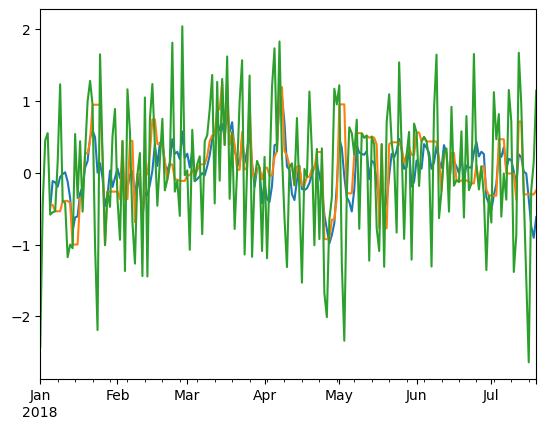

In [2]:
rm = tx.rolling(window = 5, center = False).mean()
rn = tx.rolling(window = 5, center = False).median()
rm.plot()
rn.plot()
tx.plot()
plt.show()

## expanding

该算子可以看做一个扩展的窗口，最开始窗口为1，聚合一次之后，窗口位置不变，但是大小增加1，直到窗口的覆盖整个序列

![hellworld](../images/expanding.png)
![hellworld](../images/expanding2.png)

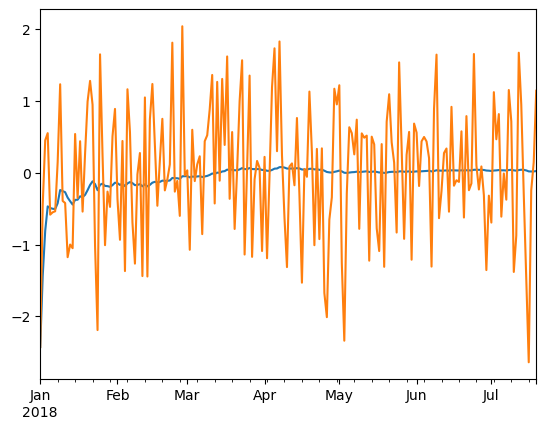

In [3]:
a=tx.expanding().mean()
a.plot()
tx.plot()
plt.show()

## ewm

指数加权函数滑动窗口(ewm)算子可以计算指数加权平均值的计算，具体的说来，就是更近观测的数值具有更高的权重，对于ewm指定权重的方式即指定跨度（span）

由于给近期的观测值更高的权重，与等权重相比，它对变化适应的更快。

![hellworld](../images/ewm.png)
![hellworld](../images/ewm2.png)

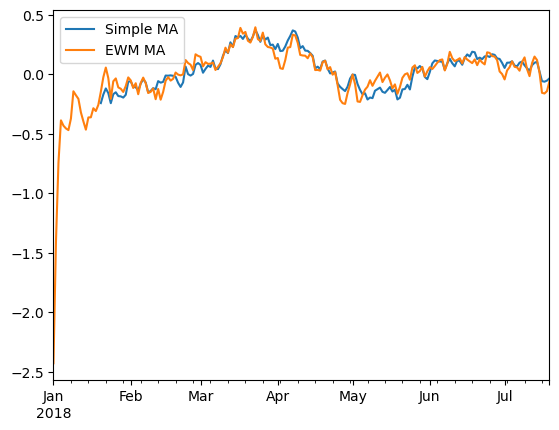

In [4]:
ma60 = tx.rolling(30, min_periods=20).mean()
#简单平均
ewma60 = tx.ewm(span=30).mean()
#指数加权平均
ma60.plot(label="Simple MA")
ewma60.plot(label="EWM MA")
plt.legend()
plt.show()